In [564]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr, skew
from empiricaldist import Pmf , Cdf
from matplotlib.ticker import PercentFormatter

## EDA

In [434]:
df = pd.read_csv("E2001.csv")

In [435]:
df.head()

,Statistic Label,County,Sex,CensusYear,UNIT,VALUE
0,Population at Each Census 1841 to 2016,State,Both sexes,1841,Number,6528799
1,Population at Each Census 1841 to 2016,State,Both sexes,1851,Number,5111557
2,Population at Each Census 1841 to 2016,State,Both sexes,1861,Number,4402111
3,Population at Each Census 1841 to 2016,State,Both sexes,1871,Number,4053187
4,Population at Each Census 1841 to 2016,State,Both sexes,1881,Number,3870020


In [436]:
df.shape

(2025, 6)

In [437]:
df.dtypes

Statistic Label    object
County             object
Sex                object
CensusYear          int64
UNIT               object
VALUE               int64
dtype: object

In [329]:
df.describe()

,CensusYear,VALUE
count,2025.000000,2.025000e+03
mean,1943.560000,1.822066e+05
std,52.710705,5.052940e+05
min,1841.000000,1.201300e+04
25%,1901.000000,3.630800e+04
50%,1956.000000,6.288100e+04
75%,1986.000000,1.115240e+05
max,2016.000000,6.528799e+06


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  2025 non-null   object
 1   County           2025 non-null   object
 2   Sex              2025 non-null   object
 3   CensusYear       2025 non-null   int64 
 4   UNIT             2025 non-null   object
 5   VALUE            2025 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 95.1+ KB


In [331]:
df.isna().sum()

Statistic Label    0
County             0
Sex                0
CensusYear         0
UNIT               0
VALUE              0
dtype: int64

In [332]:
df.duplicated().sum()

0

In [333]:
df.rename(columns = {"Statistic Label": "Stat_label", "CensusYear": "Year", "VALUE": "Population"}, inplace = True)
df.drop(columns = ["UNIT"], inplace = True)
df

,Stat_label,County,Sex,Year,Population
0,Population at Each Census 1841 to 2016,State,Both sexes,1841,6528799
1,Population at Each Census 1841 to 2016,State,Both sexes,1851,5111557
2,Population at Each Census 1841 to 2016,State,Both sexes,1861,4402111
3,Population at Each Census 1841 to 2016,State,Both sexes,1871,4053187
4,Population at Each Census 1841 to 2016,State,Both sexes,1881,3870020
...,...,...,...,...,...
2020,Population at Each Census 1841 to 2016,Monaghan,Female,1996,25155
2021,Population at Each Census 1841 to 2016,Monaghan,Female,2002,25787
2022,Population at Each Census 1841 to 2016,Monaghan,Female,2006,27414
2023,Population at Each Census 1841 to 2016,Monaghan,Female,2011,30042


In [334]:
print(f'Stat_label: {df["Stat_label"].unique()}')
print(f'Stat_label: {df["Stat_label"].nunique()}')

Stat_label: ['Population at Each Census 1841 to 2016']
Stat_label: 1


In [335]:
print(f'County: {df["County"].unique()}')
print(f'County: {df["County"].nunique()}')

County: ['State' 'Carlow' 'Dublin' 'Kildare' 'Kilkenny' 'Laois' 'Longford' 'Louth'
 'Meath' 'Offaly' 'Westmeath' 'Wexford' 'Wicklow' 'Clare' 'Cork' 'Kerry'
 'Limerick' 'Tipperary' 'Waterford' 'Galway' 'Leitrim' 'Mayo' 'Roscommon'
 'Sligo' 'Cavan' 'Donegal' 'Monaghan']
County: 27


In [336]:
print(f'Sex: {df["Sex"].unique()}')
print(f'Sex: {df["Sex"].nunique()}')

Sex: ['Both sexes' 'Male' 'Female']
Sex: 3


In [337]:
print(f'Year: {df["Year"].unique()}')
print(f'Year: {df["Year"].nunique()}')

Year: [1841 1851 1861 1871 1881 1891 1901 1911 1926 1936 1946 1951 1956 1961
 1966 1971 1979 1981 1986 1991 1996 2002 2006 2011 2016]
Year: 25


- Testing if the data is consistent by splitting it in the section that has generalized data and the section that has the complete set of data

In [338]:
df.loc[df["Sex"] == "Both sexes"].loc[df["County"] == "State"].groupby("Year")["Population"].sum()

Year
1841    6528799
1851    5111557
1861    4402111
1871    4053187
1881    3870020
1891    3468694
1901    3221823
1911    3139688
1926    2971992
1936    2968420
1946    2955107
1951    2960593
1956    2898264
1961    2818341
1966    2884002
1971    2978248
1979    3368217
1981    3443405
1986    3540643
1991    3525719
1996    3626087
2002    3917203
2006    4239848
2011    4588252
2016    4761865
Name: Population, dtype: int64

In [339]:
df.loc[df["Sex"] != "Both sexes"].loc[df["County"] != "State"].groupby("Year")["Population"].sum()

Year
1841    6528799
1851    5111557
1861    4402111
1871    4053187
1881    3870020
1891    3468694
1901    3221823
1911    3139688
1926    2971992
1936    2968420
1946    2955107
1951    2960593
1956    2898264
1961    2818341
1966    2884002
1971    2978248
1979    3368217
1981    3443405
1986    3540643
1991    3525719
1996    3626087
2002    3917203
2006    4239848
2011    4588252
2016    4761865
Name: Population, dtype: int64

In [340]:
df.loc[df["County"] == "State"].loc[df["Sex"] != "Both sexes"].groupby("Year")["Population"].sum()

Year
1841    6528799
1851    5111557
1861    4402111
1871    4053187
1881    3870020
1891    3468694
1901    3221823
1911    3139688
1926    2971992
1936    2968420
1946    2955107
1951    2960593
1956    2898264
1961    2818341
1966    2884002
1971    2978248
1979    3368217
1981    3443405
1986    3540643
1991    3525719
1996    3626087
2002    3917203
2006    4239848
2011    4588252
2016    4761865
Name: Population, dtype: int64

In [341]:
df.loc[df["County"] != "State"].loc[df["Sex"] != "Both sexes"].groupby("Year")["Population"].sum()

Year
1841    6528799
1851    5111557
1861    4402111
1871    4053187
1881    3870020
1891    3468694
1901    3221823
1911    3139688
1926    2971992
1936    2968420
1946    2955107
1951    2960593
1956    2898264
1961    2818341
1966    2884002
1971    2978248
1979    3368217
1981    3443405
1986    3540643
1991    3525719
1996    3626087
2002    3917203
2006    4239848
2011    4588252
2016    4761865
Name: Population, dtype: int64

- Sectioning the data in the Generalized one (Including the general data of "Both sexes" and "State" which includes all the counties)

In [342]:
df_general = df.loc[df["Sex"] == "Both sexes"].loc[df["County"] == "State"]
df_general

,Stat_label,County,Sex,Year,Population
0,Population at Each Census 1841 to 2016,State,Both sexes,1841,6528799
1,Population at Each Census 1841 to 2016,State,Both sexes,1851,5111557
2,Population at Each Census 1841 to 2016,State,Both sexes,1861,4402111
3,Population at Each Census 1841 to 2016,State,Both sexes,1871,4053187
4,Population at Each Census 1841 to 2016,State,Both sexes,1881,3870020
5,Population at Each Census 1841 to 2016,State,Both sexes,1891,3468694
6,Population at Each Census 1841 to 2016,State,Both sexes,1901,3221823
7,Population at Each Census 1841 to 2016,State,Both sexes,1911,3139688
8,Population at Each Census 1841 to 2016,State,Both sexes,1926,2971992
9,Population at Each Census 1841 to 2016,State,Both sexes,1936,2968420


- Sectioning the data in the Expanded one (Including "Both sexes" which is Male and Female and "State" all the counties)

In [343]:
df_expanded = df.loc[df["Sex"] != "Both sexes"].loc[df["County"] != "State"]
df_expanded 

,Stat_label,County,Sex,Year,Population
100,Population at Each Census 1841 to 2016,Carlow,Male,1841,42428
101,Population at Each Census 1841 to 2016,Carlow,Male,1851,33016
102,Population at Each Census 1841 to 2016,Carlow,Male,1861,28139
103,Population at Each Census 1841 to 2016,Carlow,Male,1871,25464
104,Population at Each Census 1841 to 2016,Carlow,Male,1881,23078
...,...,...,...,...,...
2020,Population at Each Census 1841 to 2016,Monaghan,Female,1996,25155
2021,Population at Each Census 1841 to 2016,Monaghan,Female,2002,25787
2022,Population at Each Census 1841 to 2016,Monaghan,Female,2006,27414
2023,Population at Each Census 1841 to 2016,Monaghan,Female,2011,30042


In [510]:
df_density_resume = df_expanded.loc[df_expanded["Year"] == 2016].groupby("County")["Population"].sum()
df_density_resume

County
Carlow         56932
Cavan          76176
Clare         118817
Cork          542868
Donegal       159192
Dublin       1347359
Galway        258058
Kerry         147707
Kildare       222504
Kilkenny       99232
Laois          84697
Leitrim        32044
Limerick      194899
Longford       40873
Louth         128884
Mayo          130507
Meath         195044
Monaghan       61386
Offaly         77961
Roscommon      64544
Sligo          65535
Tipperary     159553
Waterford     116176
Westmeath      88770
Wexford       149722
Wicklow       142425
Name: Population, dtype: int64

- Plotting the Population number by Year to see how it has behaved

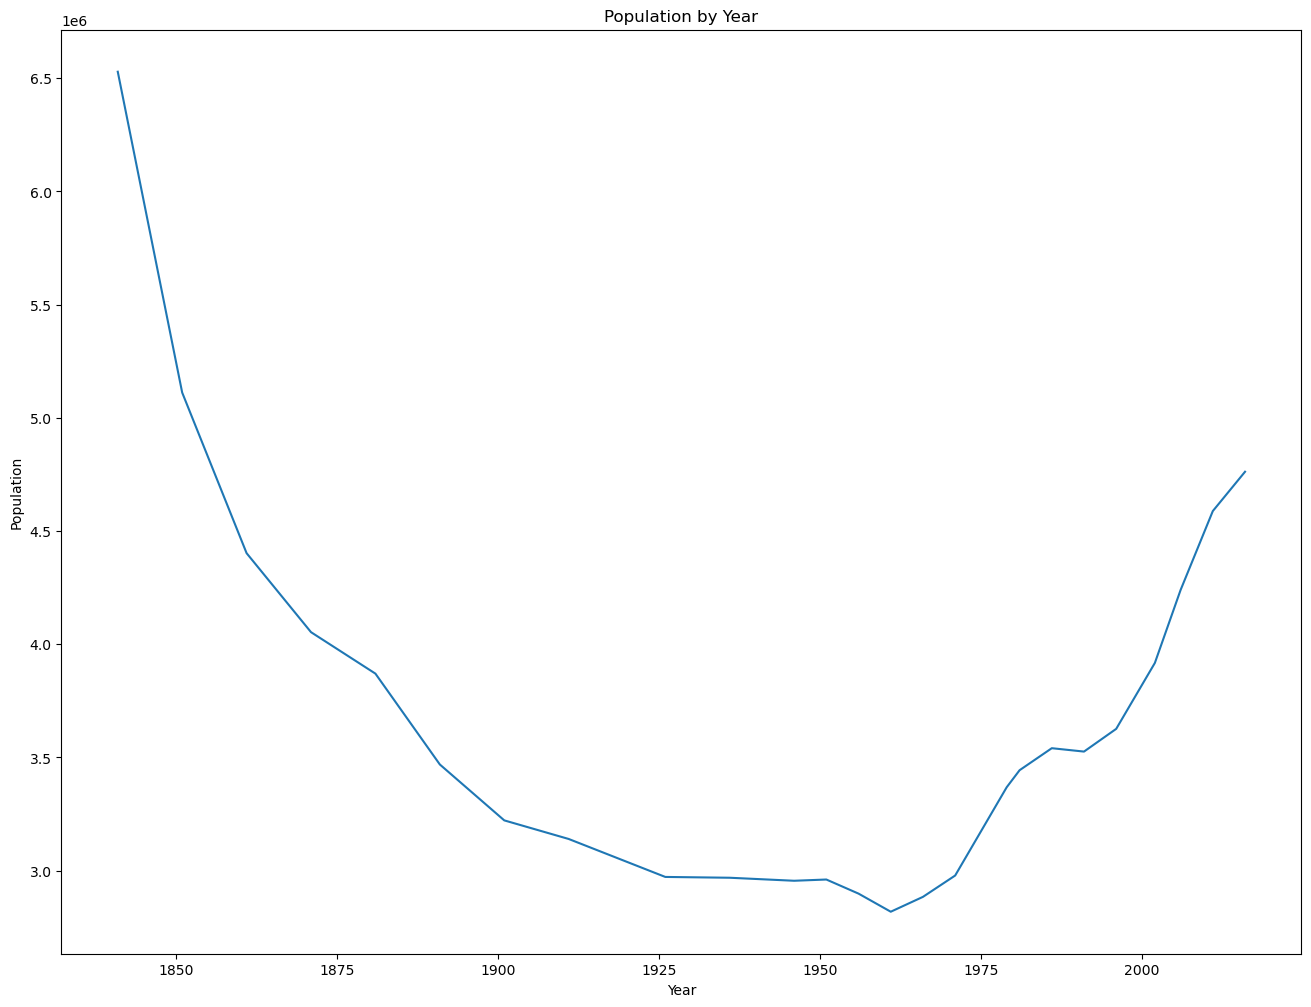

In [344]:
plt.figure(figsize = (16,12))
ax = sns.lineplot(x = "Year", y = "Population", data = df_general);
plt.title("Population by Year")
plt.show()

- Plotting the Population Number by County for an specific year

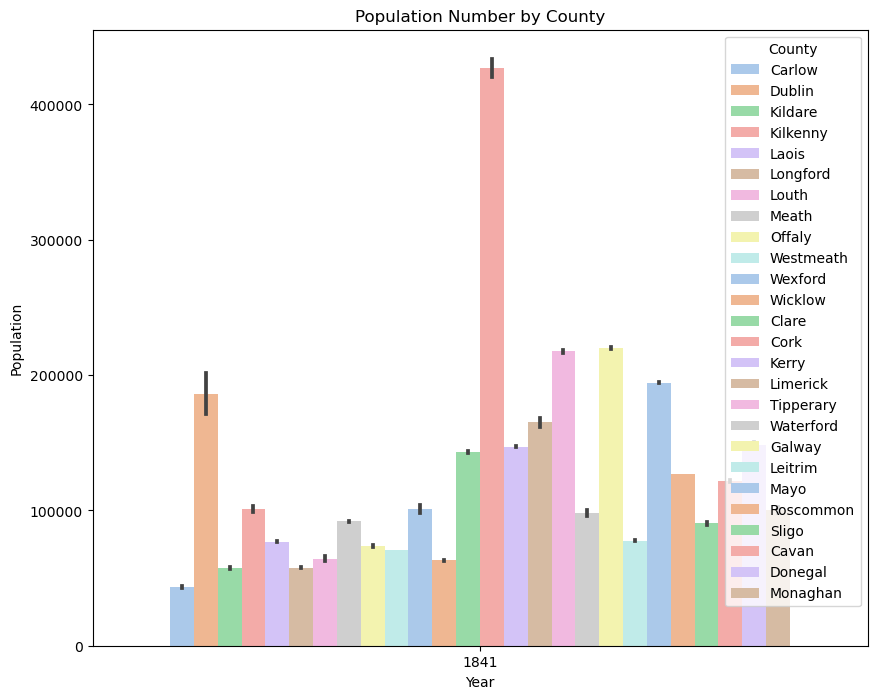

In [392]:
plt.figure(figsize = (10,8))
ax = sns.barplot(x = "Year", y = "Population", hue = "County", data = df_expanded.loc[df["County"] != "State"].loc[df["Year"] == 1841], palette="pastel");
plt.title("Population Number by County")
plt.show()

- Plotting the Population number in percentage for an specific year

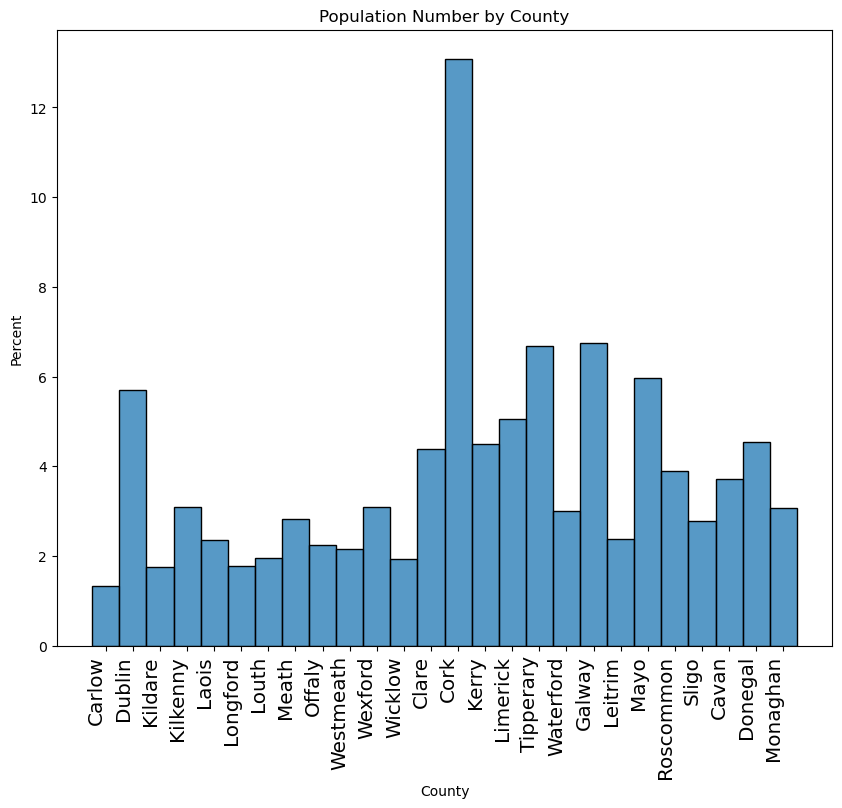

In [394]:
plt.figure(figsize = (10,8))
ax = sns.histplot(x = "County", weights = "Population",multiple="dodge", stat="percent", data = df_expanded.loc[df["County"] != "State"].loc[df["Year"] == 1841]);
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title("Population Number by County")
plt.show()

In [350]:
df.loc[df["Sex"] != "Both sexes"].loc[df["County"] != "State"].loc[df["Year"] == 1841].groupby(["Year","Sex"])["Population"].sum()

Year  Sex   
1841  Female    3306314
      Male      3222485
Name: Population, dtype: int64

- Distribution of Population by County along the years

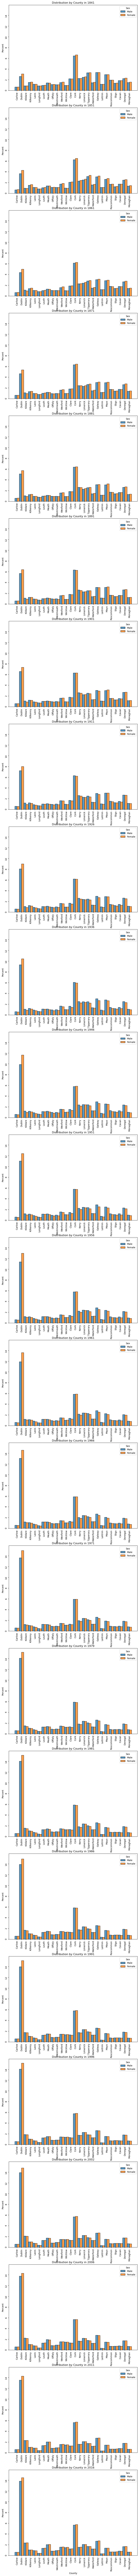

In [363]:
years= df_expanded["Year"].unique()


# Create a subplot for each year
fig, axes = plt.subplots(nrows=len(years), figsize=(10, 200), sharey=True)

# Loop for over the years
for i, year in enumerate(years):
    data = df_expanded.loc[df_expanded["Year"]==year]
#     sns.barplot(data=data, x="CensusYear",y="VALUE", hue = "County", ax=axes[i])
    sns.histplot(x = "County", weights = "Population",multiple="dodge",hue="Sex", stat="percent", data = data, ax=axes[i]);
    axes[i].set_title(f'Distribution by County in {year}')
    axes[i].tick_params(labelrotation=90)

plt.show()

- Density tests

In [364]:
df_density = df.loc[df["Sex"] == "Both sexes"].loc[df["County"] != "State"]
df_density

,Stat_label,County,Sex,Year,Population
75,Population at Each Census 1841 to 2016,Carlow,Both sexes,1841,86228
76,Population at Each Census 1841 to 2016,Carlow,Both sexes,1851,68078
77,Population at Each Census 1841 to 2016,Carlow,Both sexes,1861,57137
78,Population at Each Census 1841 to 2016,Carlow,Both sexes,1871,51650
79,Population at Each Census 1841 to 2016,Carlow,Both sexes,1881,46568
...,...,...,...,...,...
1970,Population at Each Census 1841 to 2016,Monaghan,Both sexes,1996,51313
1971,Population at Each Census 1841 to 2016,Monaghan,Both sexes,2002,52593
1972,Population at Each Census 1841 to 2016,Monaghan,Both sexes,2006,55997
1973,Population at Each Census 1841 to 2016,Monaghan,Both sexes,2011,60483


In [365]:
dict= {"Cork": 7457, "Galway": 6148, "Mayo": 5585, "Donegal": 4841, "Kerry": 4746, "Tipperary": 4303, "Tyrone": 3155, "Clare": 3147, "Antrim": 2844, "Limerick": 2686, "Roscommon": 2547, "Down": 2448, "Wexford": 2352, "Meath": 2342, "Derry": 2074, "Kilkenny": 2061, "Wicklow": 2024, "Offaly": 2000, "Cavan": 1931, "Westmeath": 1838, "Waterford": 1837, "Sligo": 1836, "Laois": 1719, "Kildare": 1693, "Fermanagh": 1691, "Leitrim": 1691, "Monaghan": 1294 , "Armagh": 1254, "Longford": 1091, "Dublin": 921, "Carlow": 896, "Louth": 820}      

In [367]:
County_Area = []

for i,row in df_density.iterrows():
    if row["County"] in dict:
        County_Area.append(dict[row["County"]])

df_density["County_Area"] = County_Area
df_density.head()

,Stat_label,County,Sex,Year,Population,County_Area
75,Population at Each Census 1841 to 2016,Carlow,Both sexes,1841,86228,896
76,Population at Each Census 1841 to 2016,Carlow,Both sexes,1851,68078,896
77,Population at Each Census 1841 to 2016,Carlow,Both sexes,1861,57137,896
78,Population at Each Census 1841 to 2016,Carlow,Both sexes,1871,51650,896
79,Population at Each Census 1841 to 2016,Carlow,Both sexes,1881,46568,896


In [368]:
df_density.loc[df_density["County"] == "Dublin"].loc[df_density["Year"] == 2016]

,Stat_label,County,Sex,Year,Population,County_Area
174,Population at Each Census 1841 to 2016,Dublin,Both sexes,2016,1347359,921


In [380]:
df_density.loc[(df_density["County"] == "Dublin") & (df_density["Year"] == 2016)]["Population"]/df_density.loc[(df_density["County"] == "Dublin") & (df_density["Year"] == 2016)]["County_Area"]

174    1462.93051
dtype: float64

In [381]:
df_density["Population_Density"] = df_density["Population"]/df_density["County_Area"]

In [384]:
df_density.head()

,Stat_label,County,Sex,Year,Population,County_Area,Population_Density
75,Population at Each Census 1841 to 2016,Carlow,Both sexes,1841,86228,896,96.236607
76,Population at Each Census 1841 to 2016,Carlow,Both sexes,1851,68078,896,75.979911
77,Population at Each Census 1841 to 2016,Carlow,Both sexes,1861,57137,896,63.768973
78,Population at Each Census 1841 to 2016,Carlow,Both sexes,1871,51650,896,57.645089
79,Population at Each Census 1841 to 2016,Carlow,Both sexes,1881,46568,896,51.973214


In [501]:
df_density_resume = df_density.groupby("County")["Population_Density"].sum()
df_density_resume

County
Carlow        1235.233259
Cavan         1139.302434
Clare          904.137909
Cork          1487.949980
Donegal        825.597810
Dublin       20491.231270
Galway         848.465192
Kerry          807.126212
Kildare       1497.455995
Kilkenny      1057.683649
Laois          941.589878
Leitrim        794.160260
Limerick      1601.309382
Longford      1014.402383
Louth         2617.251220
Mayo           750.925157
Meath         1083.075149
Monaghan      1418.743431
Offaly         839.884000
Roscommon      867.828033
Sligo         1047.308824
Tipperary      986.708111
Waterford     1358.719652
Westmeath      952.692057
Wexford       1216.426871
Wicklow       1044.704545
Name: Population_Density, dtype: float64

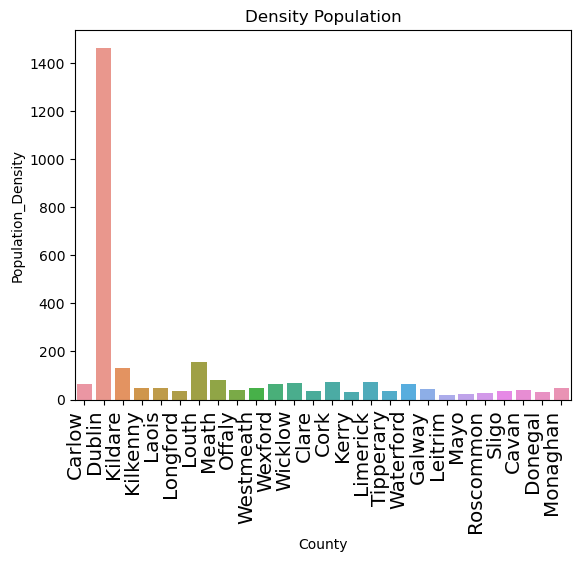

In [385]:
#plt.figure(figsize = (10,8))
#ax = sns.barplot(x = "VALUE", y = "Population_Density", hue = "County", data = df_density);
#plt.title("Population Density by county")
#plt.show()
sns.barplot(df_density.loc[df_density["Year"] == 2016], x = "County", y = "Population_Density")
plt.xticks(
    rotation = 90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title("Density Population")
plt.show()


- Denisty in Dublin along the years

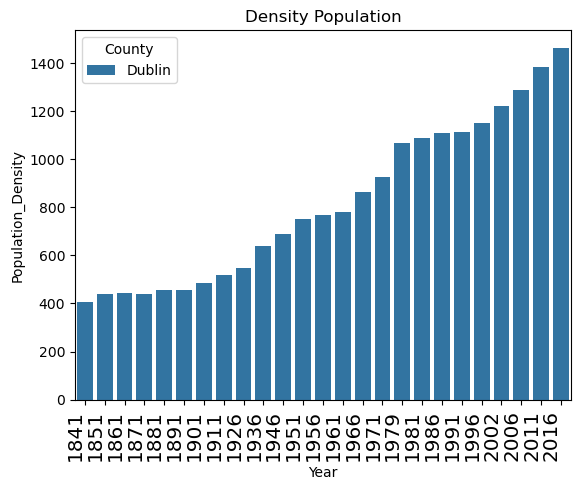

In [391]:
sns.barplot(df_density.loc[df_density["County"] == "Dublin"], x = "Year", y = "Population_Density", hue = "County")
plt.xticks(
    rotation = 90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)bb
plt.title("Density Population")
plt.show()

- Growth rate

In [395]:
#df_general.loc[(df_general["Population"])]

In [418]:
a = int(df_general.loc[df_general["Year"] == 2016]["Population"])
a

4761865

In [420]:
b = int(df_general.loc[df_general["Year"] == 2011]["Population"])
b

4588252

In [421]:
grate = ((a-b)/b)*100
print(grate)


3.783859299794344


In [422]:
grate

3.783859299794344

In [427]:
x = int(df_general.loc[df_general["Year"] == 1841]["Population"])
x

6528799

In [440]:
growth_rate = []
years = df_general["Year"].unique()

for i,row in df_general.iterrows():
    if row["Year"] == 1841:
        growth_rate.append(0)
    else:
        population = int(row["Population"])
        index = np.where(years == row["Year"])[0][0]
        prev_year = years[index-1]
        populationprev = int(df_general.loc[df_general["Year"] == prev_year]["Population"])
        grate = ((population - populationprev) / populationprev)*100
        growth_rate.append(grate)
        
df_general["growth_rate"] = growth_rate

In [441]:
df_general

,Stat_label,County,Sex,Year,Population,growth_rate
0,Population at Each Census 1841 to 2016,State,Both sexes,1841,6528799,0.000000
1,Population at Each Census 1841 to 2016,State,Both sexes,1851,5111557,-21.707545
2,Population at Each Census 1841 to 2016,State,Both sexes,1861,4402111,-13.879254
3,Population at Each Census 1841 to 2016,State,Both sexes,1871,4053187,-7.926288
4,Population at Each Census 1841 to 2016,State,Both sexes,1881,3870020,-4.519086
5,Population at Each Census 1841 to 2016,State,Both sexes,1891,3468694,-10.370127
6,Population at Each Census 1841 to 2016,State,Both sexes,1901,3221823,-7.117117
7,Population at Each Census 1841 to 2016,State,Both sexes,1911,3139688,-2.549333
8,Population at Each Census 1841 to 2016,State,Both sexes,1926,2971992,-5.341168
9,Population at Each Census 1841 to 2016,State,Both sexes,1936,2968420,-0.120189


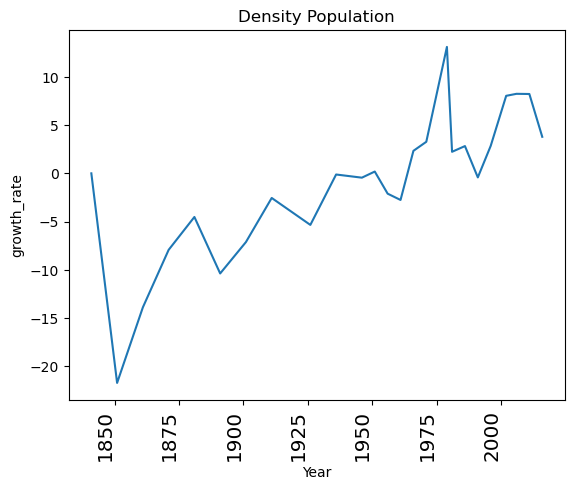

In [443]:
sns.lineplot(df_general, x = "Year", y = "growth_rate")
plt.xticks(
    rotation = 90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title("Density Population")
plt.show()

## Statistics

- Descriptive statistics

<Axes: xlabel='Population', ylabel='Count'>

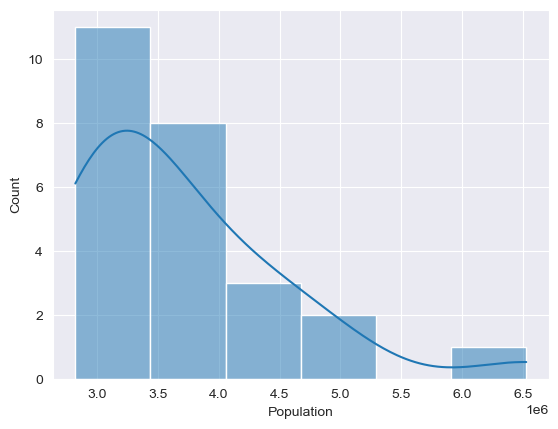

In [562]:
sns.histplot(df_general["Population"], kde = True)

right skewed  = Proved by formula 

In [561]:
s = skew(df_general["Population"], axis = 0, bias= True)
s

1.533544396636998

In [556]:
np.median(df_general["Population"])

3468694.0

<Axes: >

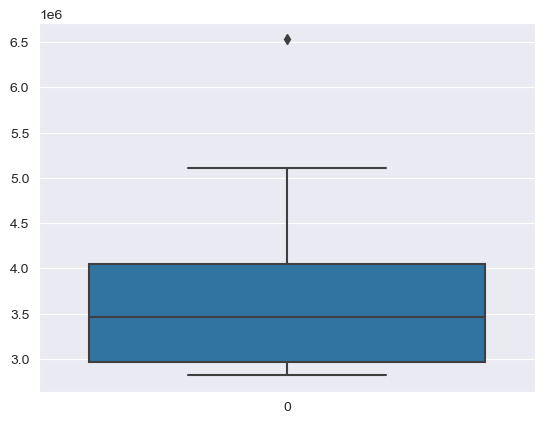

In [523]:
sns.boxplot(df_general["Population"])

In [527]:
np.std(df_general["Population"], ddof =1)

877986.3024496738

In [532]:
np.quantile(df_general["Population"],[0,0.25,0.5,0.75,1])

array([2818341., 2971992., 3468694., 4053187., 6528799.])

In [537]:
q1 = np.quantile(df_general["Population"],0.25)
q1

2971992.0

In [539]:
q3 = np.quantile(df_general["Population"],0.75)
q3

4053187.0

In [533]:
from scipy.stats import iqr

In [542]:
iqr = iqr(df_general["Population"])
iqr 

1081195.0

Outliers

In [543]:
dfprueba = df_general[((df_general["Population"]<(q1-1.5*iqr)) | (df_general["Population"]<(q3+1.5*iqr))) ]

In [544]:
dfprueba.shape

(24, 6)

In [545]:
df_general.shape

(25, 6)

In [550]:
outliers = (df_general[~((df_general["Population"]<(q1-(1.5*iqr))) | (df_general["Population"]<(q3+(1.5*iqr)))) ] )
outliers

,Stat_label,County,Sex,Year,Population,growth_rate
0,Population at Each Census 1841 to 2016,State,Both sexes,1841,6528799,0.0


In [ ]:
Probability